In [126]:
#import special libraries from python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
#read data from special source
df1=pd.read_csv('project1.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [128]:
#check shape of all informations
df1.shape

(13320, 9)

In [129]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [130]:
#remove unnesssary columns from dataset 
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# data cleaning

In [131]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [132]:
df2=df2.dropna() #delete all NaN values from dataset
df2.isnull().sum() #check again NaN values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [133]:
df2.shape #check again shape of dataframe

(13246, 5)

In [134]:
df3=df2.copy()
df3['size'].unique() #show all unique values of text column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [135]:
df3['bhh'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#number s and texts are sepeeated from  mixed text-number columns
#and storied into a new columns

In [136]:
df3.head()

,location,size,total_sqft,bath,price,bhh
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [137]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [138]:
df3[~df3['total_sqft'].apply(is_float)]
#used agrregate function that sepeate values from  '-' symbol for mean value

,location,size,total_sqft,bath,price,bhh
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [139]:
#create funcrtion that convert int to float
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [140]:
df4  = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
#use apply function that use created function

# feature engineering

In [141]:
df5 = df4.copy()
#create column that deviation of prices/total_sqft columms:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhh,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [142]:
df5.location = df5.location.apply(lambda x: x.strip())
#show values that categories of location columns with number of values
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [143]:
lo = location_stats[location_stats<=10]
lo

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [144]:
df5.location = df5.location.apply(lambda x: 'other' if x in lo else x)
len(df5.location.unique())

242

In [145]:
df5.head(10)

,location,size,total_sqft,bath,price,bhh,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [146]:
df6=df5[~(df5.total_sqft/df5.bhh<300)]
#remove some outliers
#print total_sqft/df5.bhh<300 
df6.shape

(12502, 7)

# Outlier Removal

In [147]:
df6.price_per_sqft.describe()
#show all statistical concepts

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [148]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, s in df.groupby('location'):
        m = np.mean(s.price_per_sqft)
        st = np.std(s.price_per_sqft)
        r = s[(s.price_per_sqft>(m-st)) & (s.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,r],ignore_index=True)
    return df_out    

df7 = remove_pps_outlier(df6)
df7.shape

(10241, 7)

In [149]:
def plot_scatter_chart(df,location):
    bhh2 = df[(df.location==location) & (df.bhh==2)]
    bhh3 = df[(df.location==location) & (df.bhh==3)]
    plt.matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhh2.total_sqft,bhh2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhh3.total_sqft,bhh3.price_per_sqft,marker='+',color='blue',label='3 BHK', s=50)
    plt.xlabel('Total squared feet area')
    plt.ylabel('Prices per squared Feet')
    plt.title(location)
    plt.legend()
    #show outliers as graph

In [150]:
def remove_bhh_outliers(df): #remove outliers use statistical concepts:
    e = np.array([])
    for location, location_df in df.groupby('location'):
        bhh_stats = {}
        for bhh, bhh_df in location_df.groupby('bhh'):
            bhh_stats[bhh] = {
                'mean': np.mean(bhh_df.price_per_sqft),
                'std': np.std(bhh_df.price_per_sqft),
                'count': bhh_df.shape[0]
            }
        for bhh, bhh_df in location_df.groupby('bhh'):
            stats = bhh_stats.get(bhh-1)
            if stats and stats['count']>5:
                e = np.append(e, bhh_df[bhh_df.price_per_sqft<(stats['mean'])].index.values)
    return  df.drop(e,axis='index')  

In [151]:
df8  = remove_bhh_outliers(df7)
df8.shape

(7329, 7)

Text(0, 0.5, 'Count')

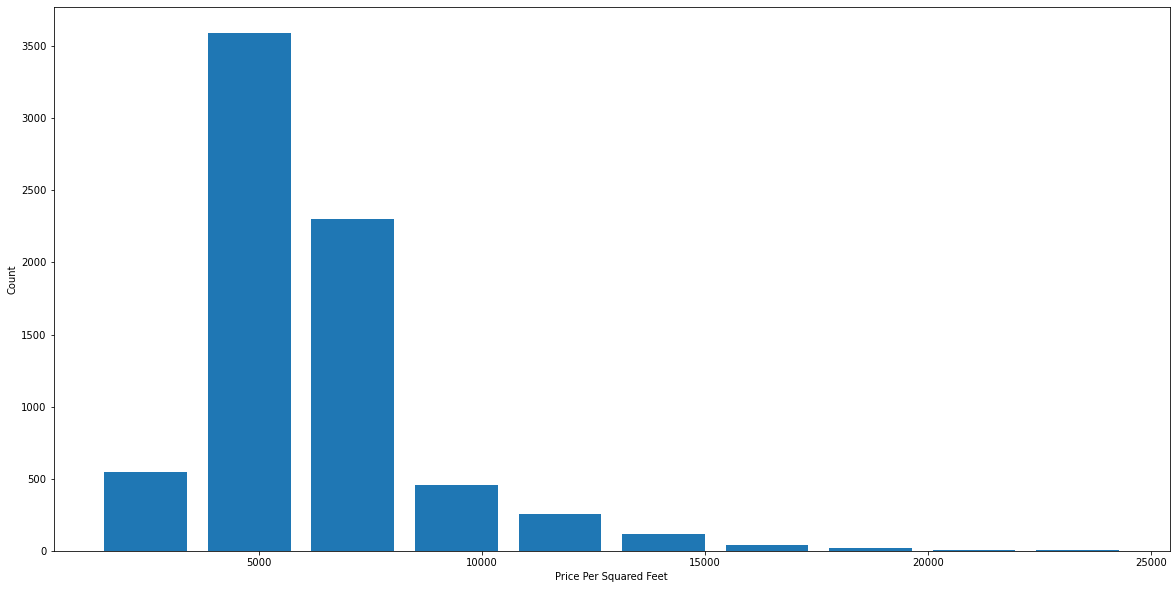

In [152]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Squared Feet')
plt.ylabel('Count')

In [153]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhh,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [154]:
df9=df8[df8.bath>df8.bhh+2]

# use machine learning model

In [155]:
#remove unnesessary columns:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhh
1626,Chikkabanavar,2460.0,7.0,80.0,4
5238,Nagasandra,7000.0,8.0,450.0,4
6711,Thanisandra,1806.0,6.0,116.0,3


In [156]:
#use one hot encoder that text to numeric value:

In [157]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Chikkabanavar,Nagasandra,Thanisandra,other
1626,1,0,0,0
5238,0,1,0,0
6711,0,0,1,0


In [158]:
df11 = pd.concat([dummies,df10],axis='columns') #add dummies to dataframe 
df11.head()

,Chikkabanavar,Nagasandra,Thanisandra,other,location,total_sqft,bath,price,bhh
1626,1,0,0,0,Chikkabanavar,2460.0,7.0,80.0,4
5238,0,1,0,0,Nagasandra,7000.0,8.0,450.0,4
6711,0,0,1,0,Thanisandra,1806.0,6.0,116.0,3
8411,0,0,0,1,other,11338.0,9.0,1000.0,6


In [159]:
df12 = df11.drop('location',axis='columns') #remove text column
df12.head(2)

,Chikkabanavar,Nagasandra,Thanisandra,other,total_sqft,bath,price,bhh
1626,1,0,0,0,2460.0,7.0,80.0,4
5238,0,1,0,0,7000.0,8.0,450.0,4


In [160]:
x = df12.drop(['price'],axis='columns') #seperate values x,y for training
y = df12.price

In [168]:
#train test model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [169]:
#create model for predicting
from sklearn.linear_model import LinearRegression 
model = LinearRegression() #create model
model.fit(x_train,y_train) #fiting values
model.score(x_test,y_test)

C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [170]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score #determone fidderent scores

In [171]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([nan, nan, nan, nan, nan])

In [176]:
#use GridSearchCV  that find best model for using our dataset
from sklearn.model_selection import GridSearchCV
#imported for determine best model and score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
           }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decison_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','firedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return  pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model(x,y)

C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\HP\fffff\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Us

C:\Users\HP\fffff\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\fffff\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\fffff\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\HP\fffff\lib\site-packages\sklearn\tree\_classes.py", line 350, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'firedman_mse'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\HP\fffff\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las

,model,best_score,best_params
0,linear_regression,NaN,{'normalize': True}
1,lasso,NaN,"{'alpha': 1, 'selection': 'random'}"
2,decison_tree,NaN,"{'criterion': 'mse', 'splitter': 'best'}"


In [178]:
#save file into pickle file:
#save file into json file:
import pickle
with open('home_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)

In [ ]:
import json
columns = {
    'data_columns': [loc.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    